Everything is perfect

    X (test func)  Y (test func)     Ideal Val
3           -18.6       0.755165  8.243326e-01
6           -17.9      89.398050  8.950000e+01
7           -17.8   -3944.261200 -3.944312e+03
17          -12.5      62.575050  6.250000e+01
19          -12.3       0.796779  8.218966e-01
20          -12.0       1.262296  8.438539e-01
27           -9.8      -1.046644 -9.304263e-01
33           -7.5    -166.267560 -1.663750e+02
34           -7.5      37.338676  3.750000e+01
42           -3.3      -0.497726 -8.346405e-01
43           -3.2      -1.390375 -1.728000e+00
44           -2.0       0.090896  1.673702e-38
45           -1.9       9.340852  9.500000e+00
50           -0.8       1.358703  1.728000e+00
51           -0.5       2.143363  2.500000e+00
54            1.0       0.710395  5.403023e-01
59            2.6      -0.804490 -7.558090e-01
67            6.8       0.954455  8.693975e-01
72            8.5      42.633842  4.250000e+01
82           14.1    4173.456000  4.1

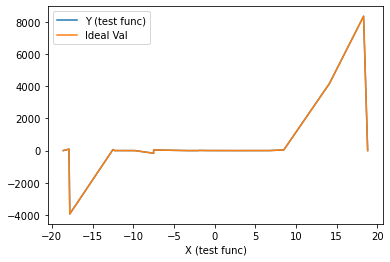

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math 


class train_ideal:
    def __init__(self, x, y1, y2, y3, y4, y1_delta, y2_delta, y3_delta, y4_delta):
        self.x = x
        self.y1 = y1
        self.y2 = y2
        self.y3 = y3
        self.y4 = y4
        self.y1_delta = y1_delta
        self.y2_delta = y2_delta
        self.y3_delta = y3_delta
        self.y4_delta = y4_delta

class test_included(train_ideal):
    def __init__(self, x, y1, y2, y3, y4, y1_delta, y2_delta, y3_delta, y4_delta, y):
        self.y = y
        train_ideal.__init__(self, x, y1, y2, y3, y4, y1_delta, y2_delta, y3_delta, y4_delta) 
            
class Error(Exception):
    """Base class for other exceptions"""
    pass


class allfine(Error):
    """Everything is perfect"""
    pass


class notfine(Error):
    """This is not correct"""
    pass
   

test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")
ideal = pd.read_csv("ideal.csv")

a1 = pd.DataFrame( columns =[ "y1_ideal", "y2_ideal", "y3_ideal", "y4_ideal"])
for idx,column in enumerate(ideal):
        train['construct1'] = (train['y1']-ideal[column])**2
        train['construct2'] = (train['y2']-ideal[column])**2
        train['construct3'] = (train['y3']-ideal[column])**2
        train['construct4'] = (train['y4']-ideal[column])**2
        s = pd.DataFrame([[ train['construct1'].sum(), train['construct2'].sum(),train['construct3'].sum(),train['construct4'].sum()]], columns = ["y1_ideal", "y2_ideal", "y3_ideal", "y4_ideal"])
        a1 = a1.append(s, ignore_index = True) 
        train = train.drop(['construct1','construct2','construct3','construct4'] , axis =1)

        

minvalueIndexLabel = a1.idxmin()
for index,value in minvalueIndexLabel.items():
    train[index] = ideal["y" + str(value)]


train = train.merge(test, on='x', how='left')
train["y1_delta"] = abs(train["y1_ideal"]-train["y1"])
train["y2_delta"] = abs(train["y2_ideal"]-train["y2"])
train["y3_delta"] = abs(train["y3_ideal"]-train["y3"])
train["y4_delta"] = abs(train["y4_ideal"]-train["y4"])

all_ideal = train_ideal(train["x"], train["y1_ideal"], train["y2_ideal"], train["y3_ideal"], train["y4_ideal"], train["y1_delta"], train["y2_delta"], train["y3_delta"], train["y4_delta"])
train.dropna(subset = ["y"], inplace=True)
just_test = test_included(train["x"], train["y1_ideal"], train["y2_ideal"], train["y3_ideal"], train["y4_ideal"], train["y1_delta"], train["y2_delta"], train["y3_delta"], train["y4_delta"], train["y"])


ideal_fuction = []
delta = []
actual_delta = []
ideal_val = []


i = 0
for index in just_test.x:
#     print(just_test.x.iloc[i])
    temp1 = abs(just_test.y.iloc[i] - just_test.y1.iloc[i])
    temp2 = abs(just_test.y.iloc[i] - just_test.y2.iloc[i])
    temp3 = abs(just_test.y.iloc[i] - just_test.y3.iloc[i])
    temp4 = abs(just_test.y.iloc[i] - just_test.y4.iloc[i])
    
    t = [['y1', temp1, just_test.y1.iloc[i],just_test.y1_delta.iloc[i]], ['y2', temp2, just_test.y2.iloc[i],just_test.y2_delta.iloc[i]], ['y3', temp3, just_test.y3.iloc[i],just_test.y3_delta.iloc[i]], ['y4', temp4, just_test.y4.iloc[i],just_test.y4_delta.iloc[i]]]
    differ = pd.DataFrame(t, columns = ['ideal_fuction', 'difference', 'ideal_value', 'actual_delta'])
    
    differ = differ.set_index('ideal_fuction')
    y = differ['difference'].idxmin()
    w = differ.loc[differ['difference'].idxmin(),"actual_delta"]
    q = differ.loc[differ['difference'].idxmin(),"ideal_value"]
    ideal_fuction.append(y)
    delta.append(w)
    ideal_val.append(q)
    i=i+1

x_list = just_test.x.tolist()
y_list = just_test.y.tolist()
    

final = pd.DataFrame(list(zip(x_list, y_list, delta, ideal_fuction, ideal_val)),columns =['X (test func)','Y (test func)','Delta Y (train func)', 'No. of ideal func', 'Ideal Val'])

final['max_delta'] = final["Delta Y (train func)"] * math.sqrt(2)
final['Delta Y (test func)'] = abs(final["Y (test func)"] - final['Ideal Val'])
final['Condition'] = final['Delta Y (test func)']<final['max_delta']

final.drop(final[ (final['Condition'] == False)].index, inplace = True)


try:
    if (final["Condition"] == True).all(axis=0):
        raise allfine
    elif i_num > number:
        raise notfine
except allfine:
    print("Everything is perfect")
    print()
except notfine:
    print("This is not correct")
    print()



final = final.drop(['Delta Y (train func)', "No. of ideal func", "max_delta", "Delta Y (test func)", "Condition"] , axis =1)
final.plot(x='X (test func)')

print(final)